In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1710,2020-09-21,United Kingdom,393549.0,394257.0,41811.0,41777.0,-708.0,34.0
1711,2020-09-21,Germany,273412.0,272337.0,9396.0,9386.0,1075.0,10.0
1712,2020-09-21,Iran,422263.0,422140.0,24335.0,24301.0,123.0,34.0
1713,2020-09-21,Turkey,302736.0,302867.0,7495.0,7506.0,-131.0,-11.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  10515.86997084548
RMSE =  38745.818842766785


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  313.1615160349854
RMSE =  780.2181663945103


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  76466.18518518518
RMSE =  122284.77202107756
-- World performances for deaths --
MAE =  1840.1604938271605
RMSE =  2236.7159071689716


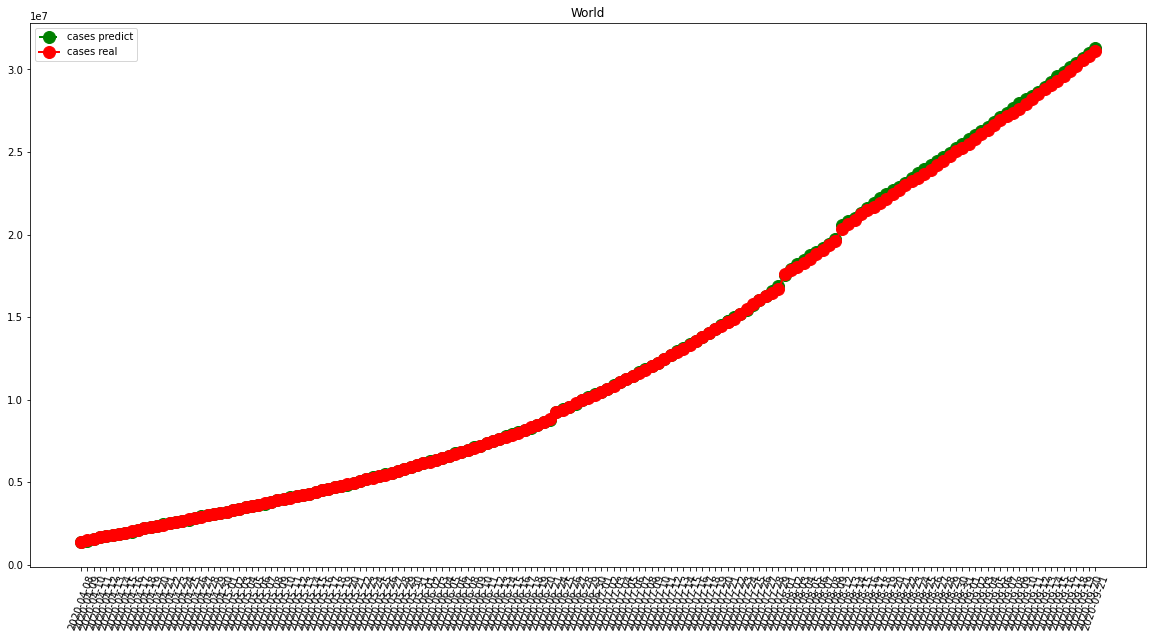

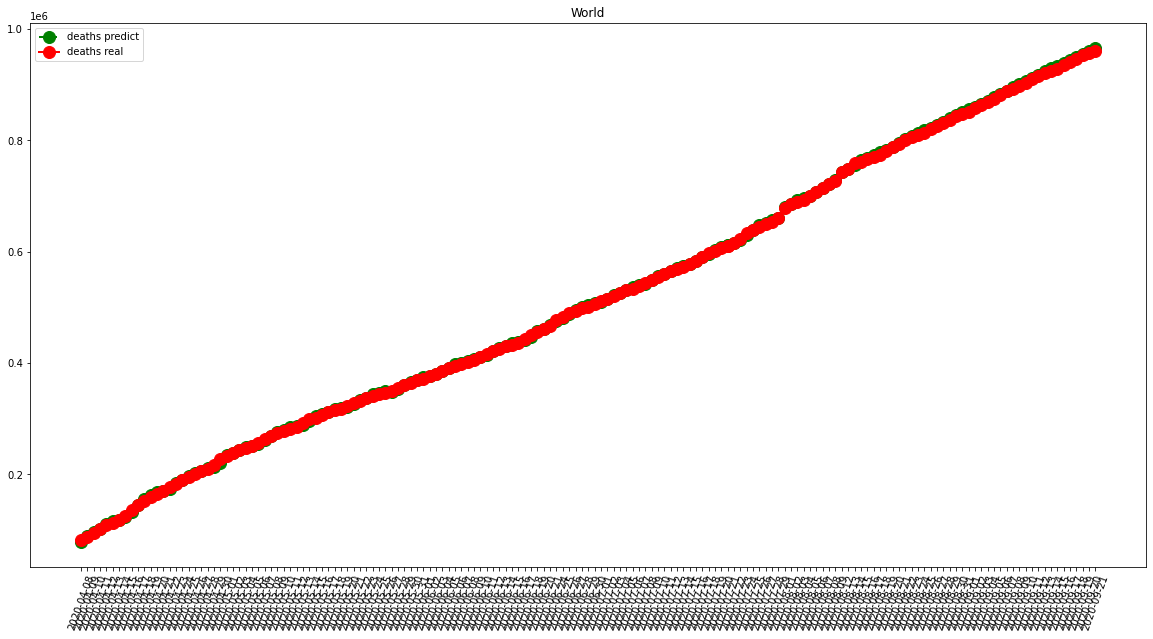

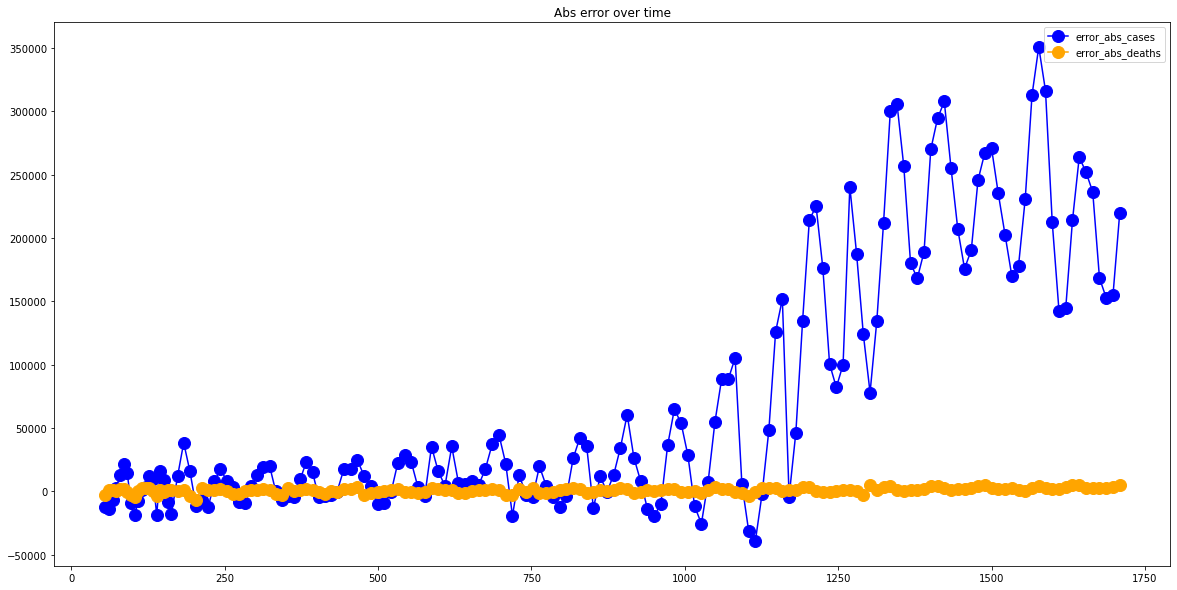

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1155.25
RMSE =  1695.4859374095347
-- France performances for deaths --
MAE =  112.00581395348837
RMSE =  256.21036278808083


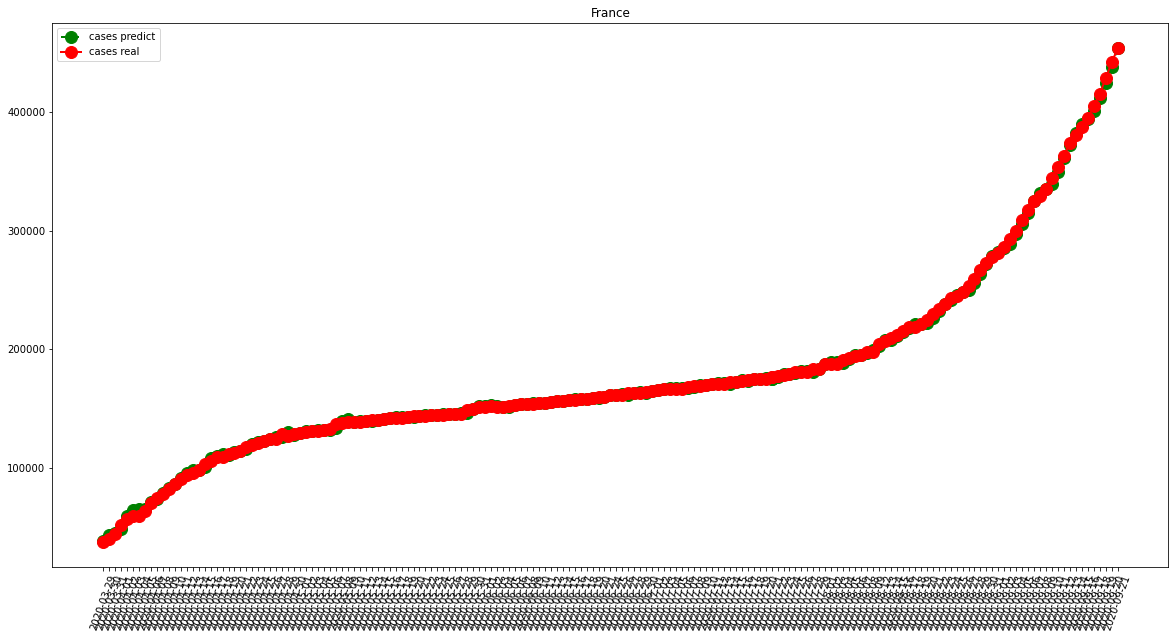

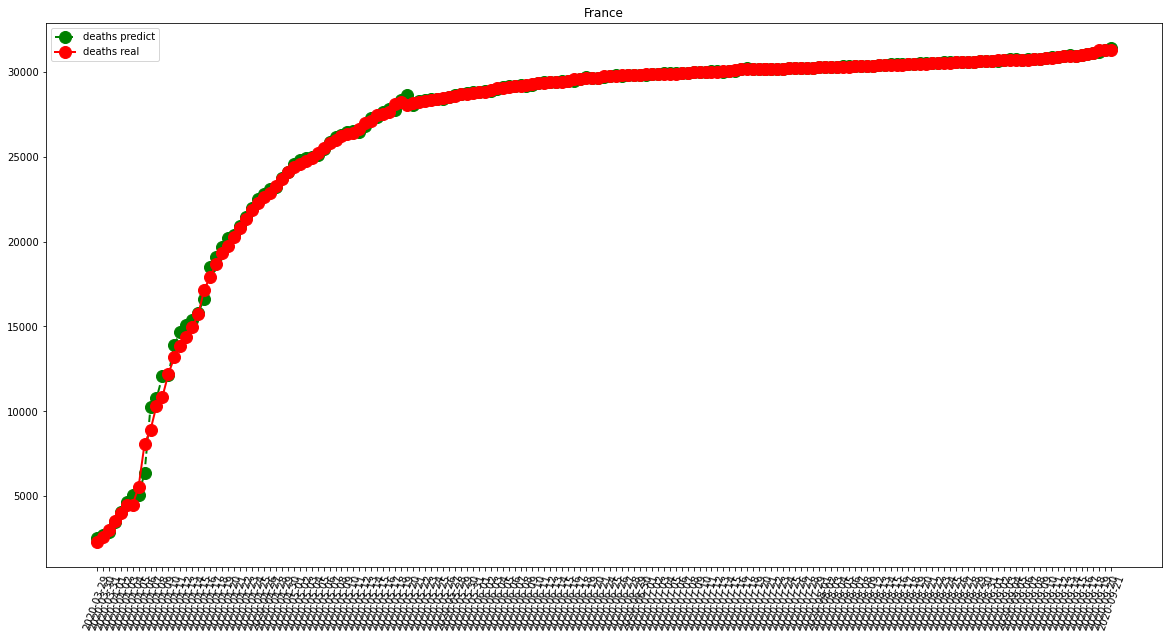

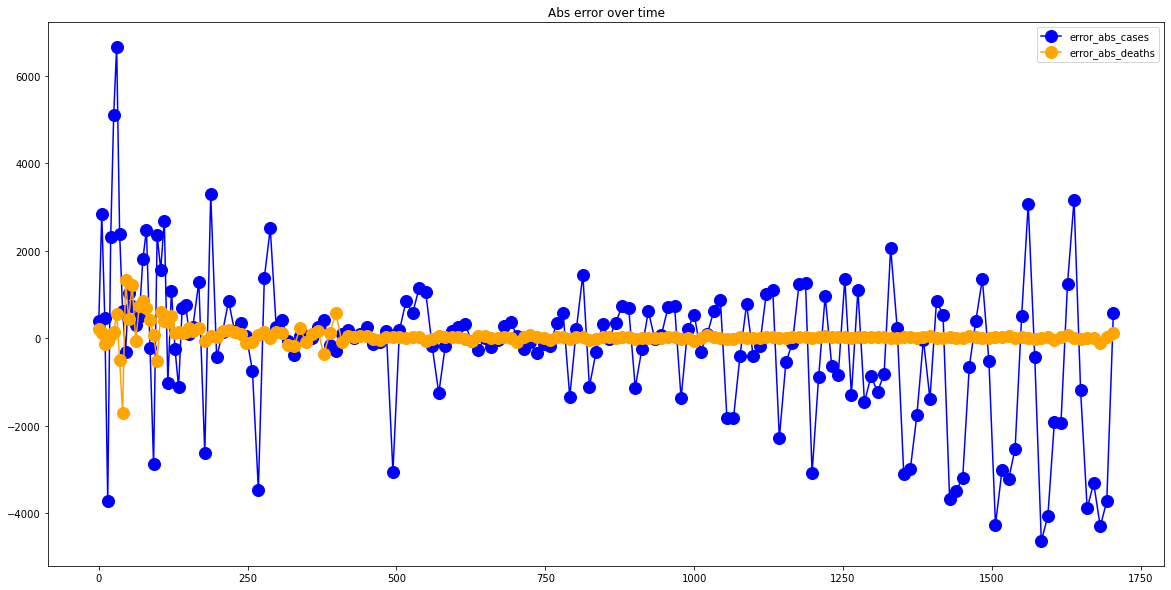

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  305.02906976744185
RMSE =  447.1103539448076
-- Italy performances for deaths --
MAE =  66.68023255813954
RMSE =  226.41971984543156


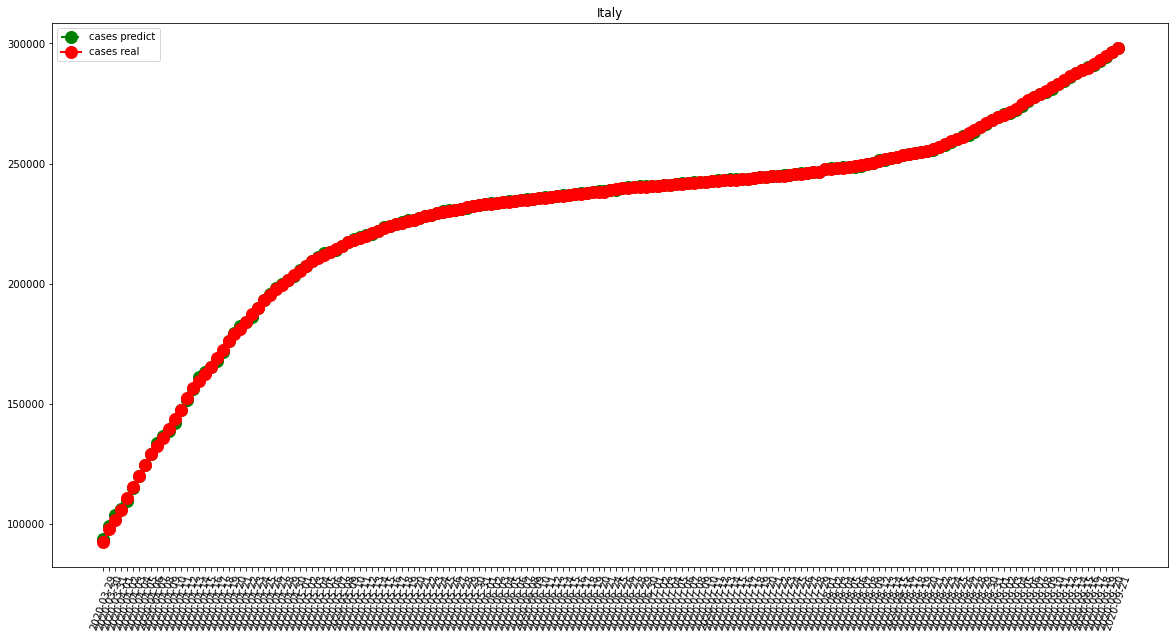

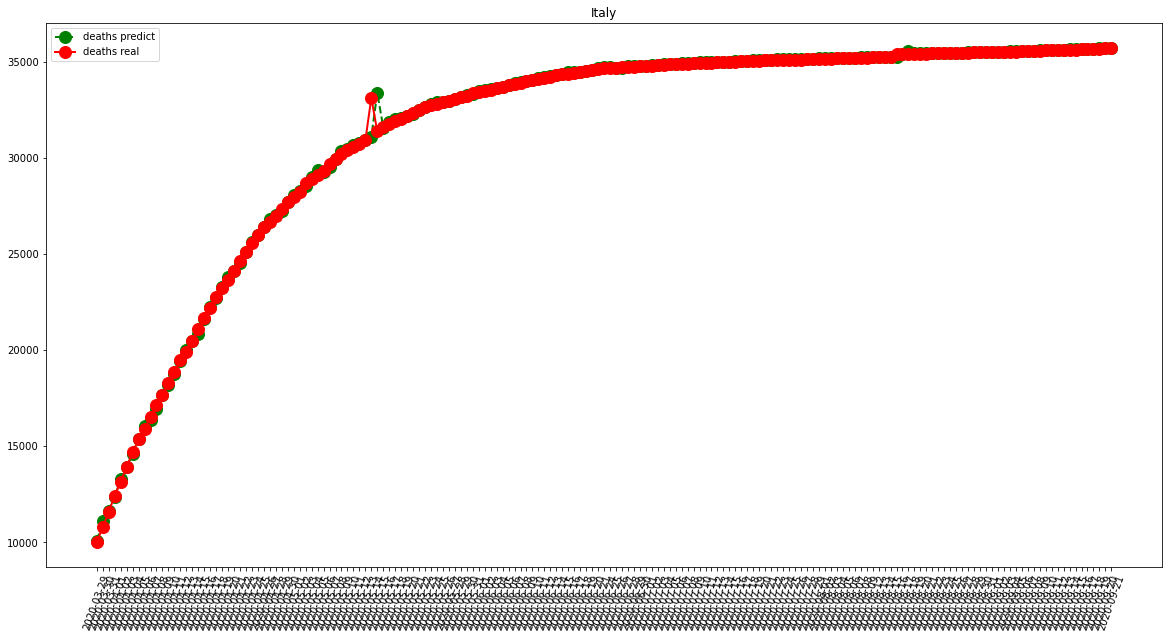

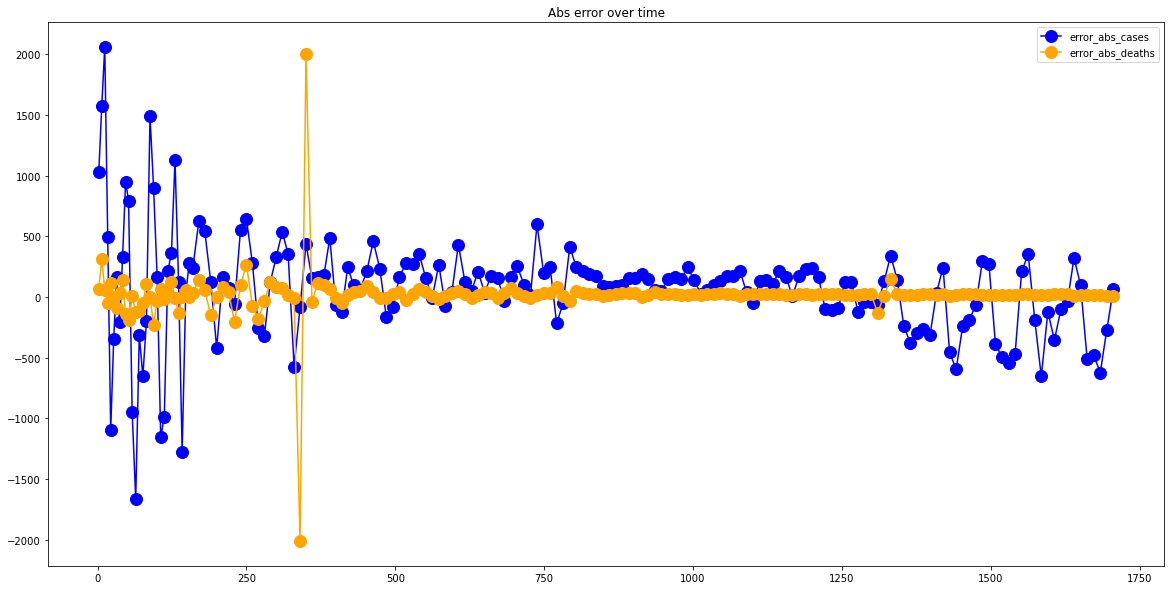

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2557.1337209302324
RMSE =  4899.920524391067
-- Spain performances for deaths --
MAE =  120.1453488372093
RMSE =  311.2678592989616


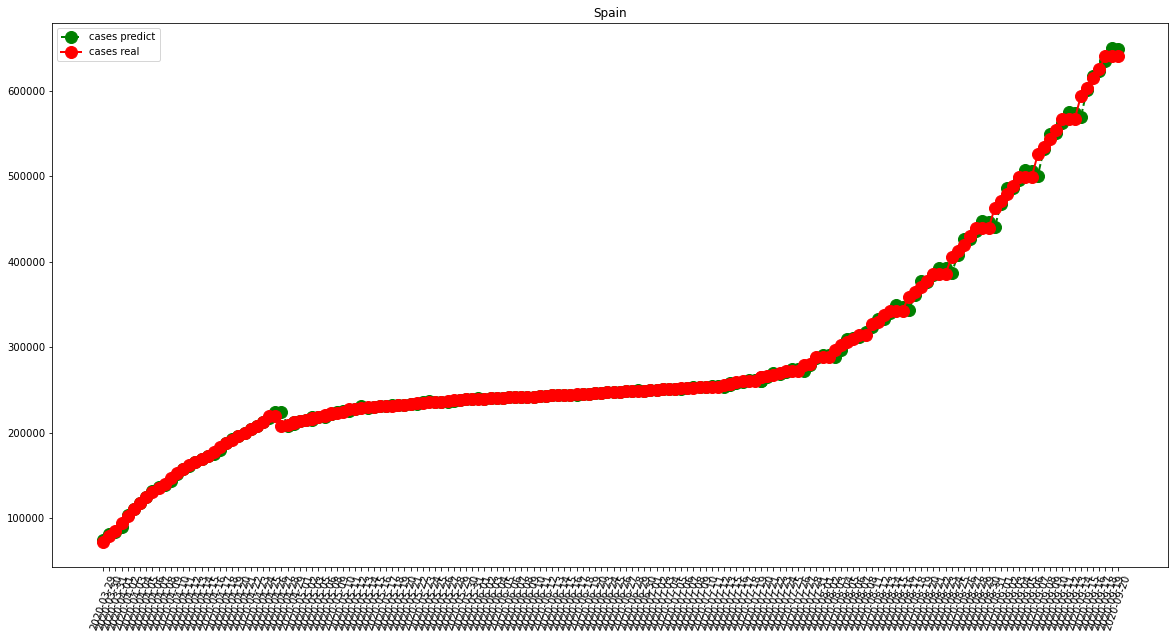

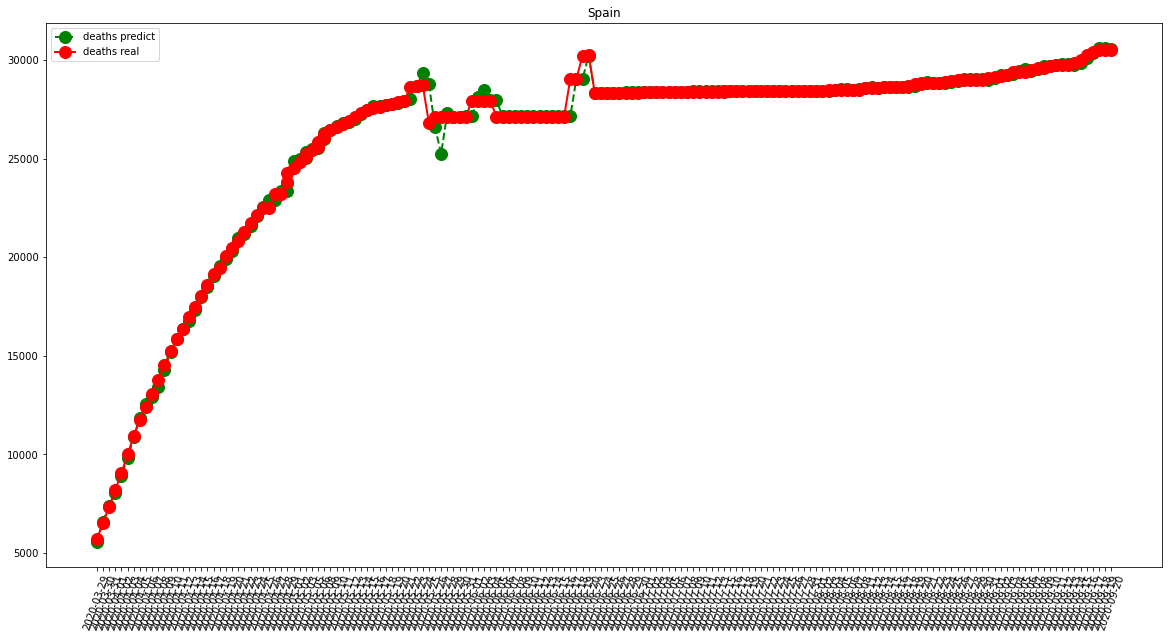

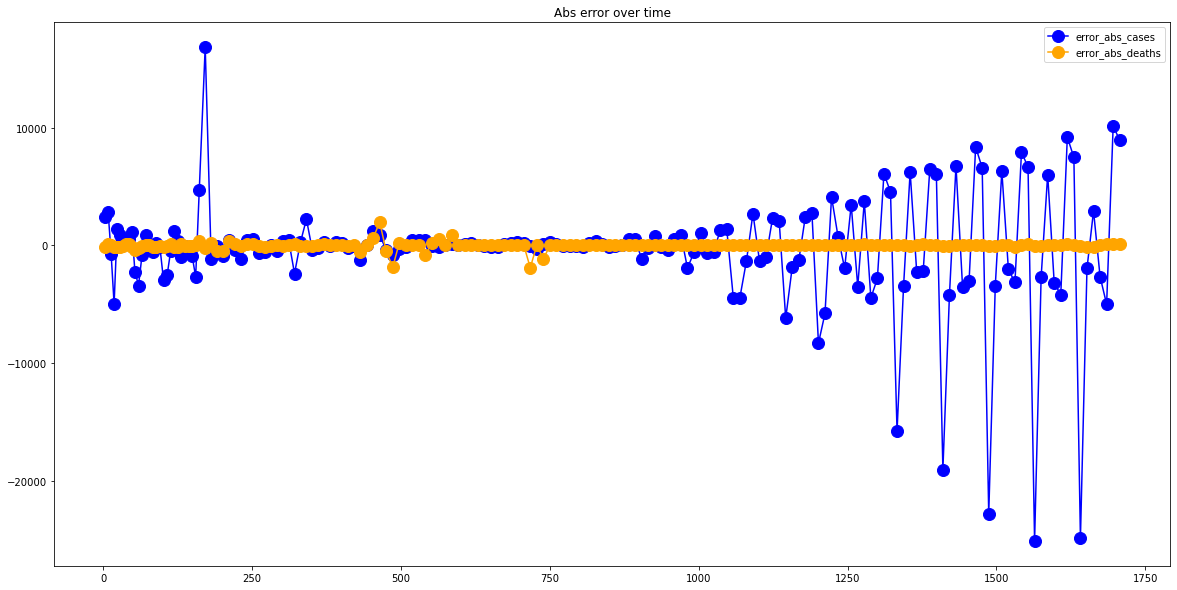

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  15539.255813953489
RMSE =  23066.4692931355
-- United States performances for deaths --
MAE =  482.86046511627904
RMSE =  674.542092744197


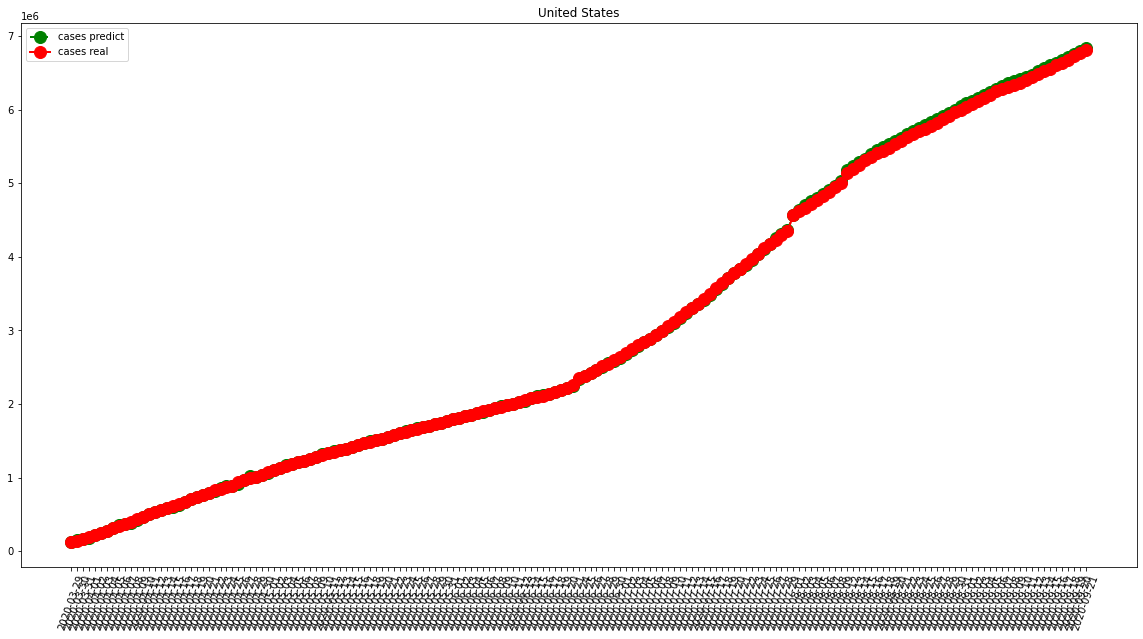

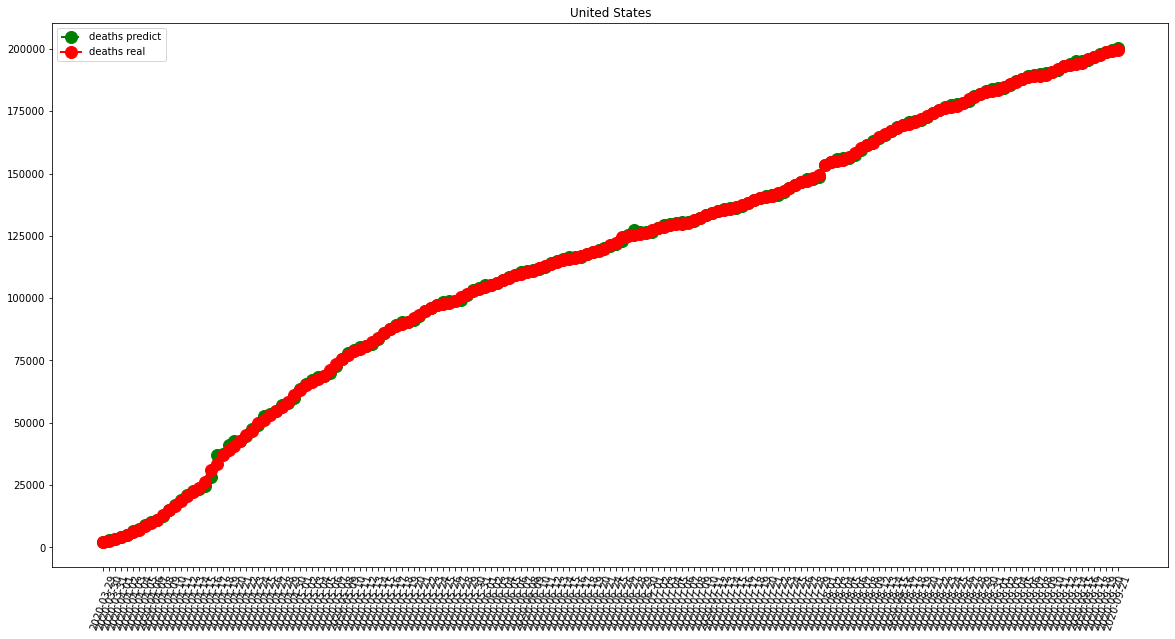

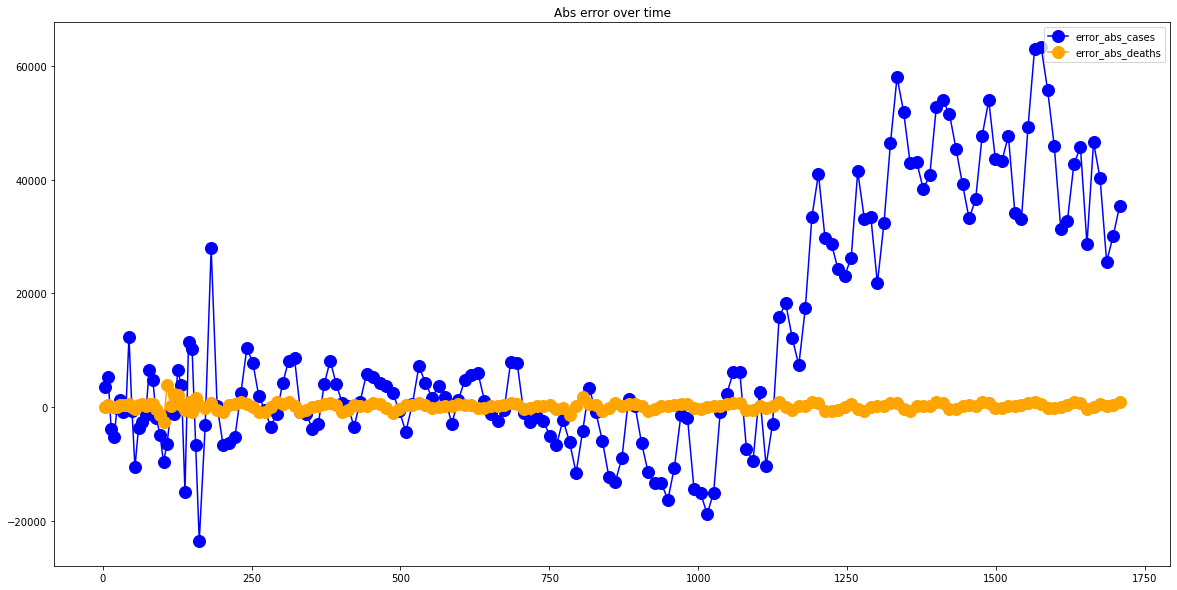

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  59.25581395348837
RMSE =  91.0581209741824
-- China performances for deaths --
MAE =  24.802325581395348
RMSE =  119.74167932446021


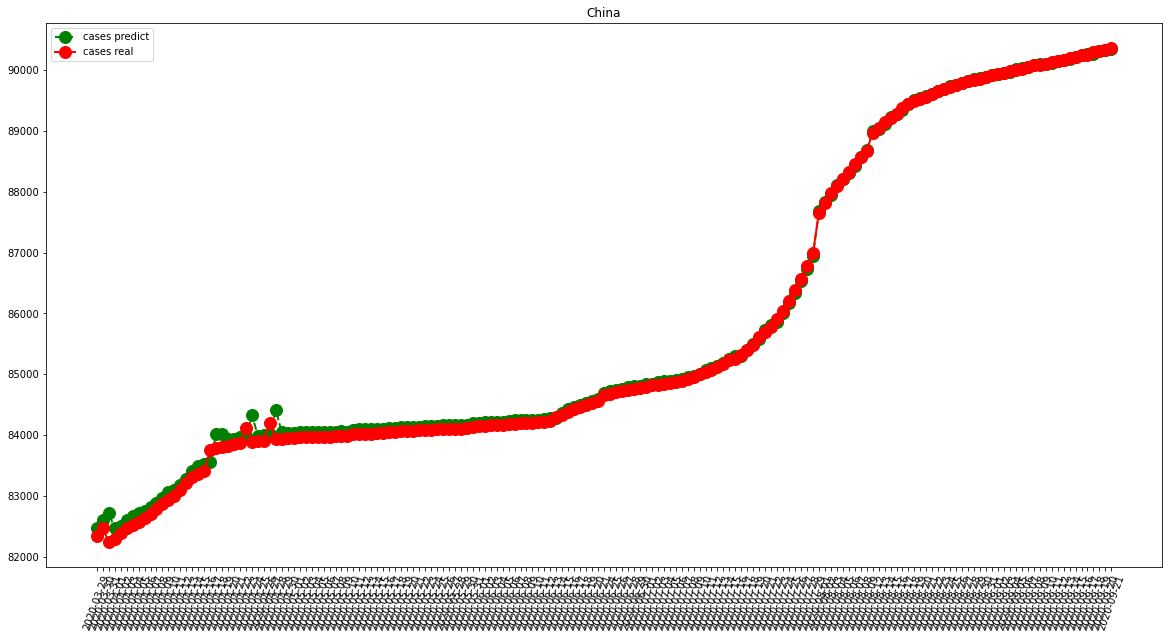

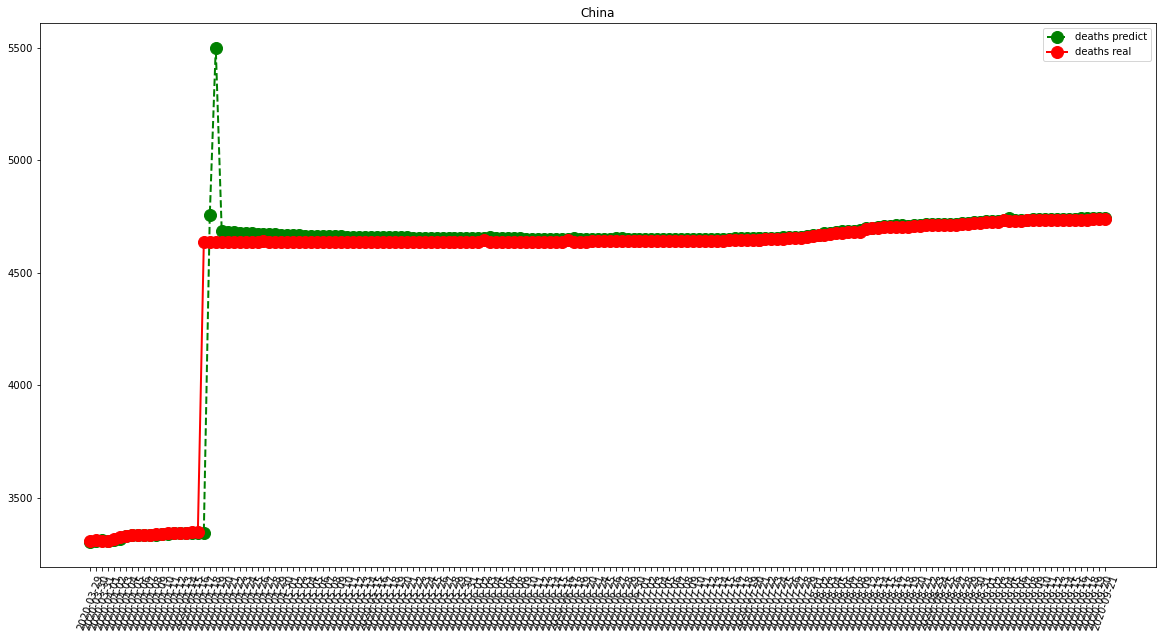

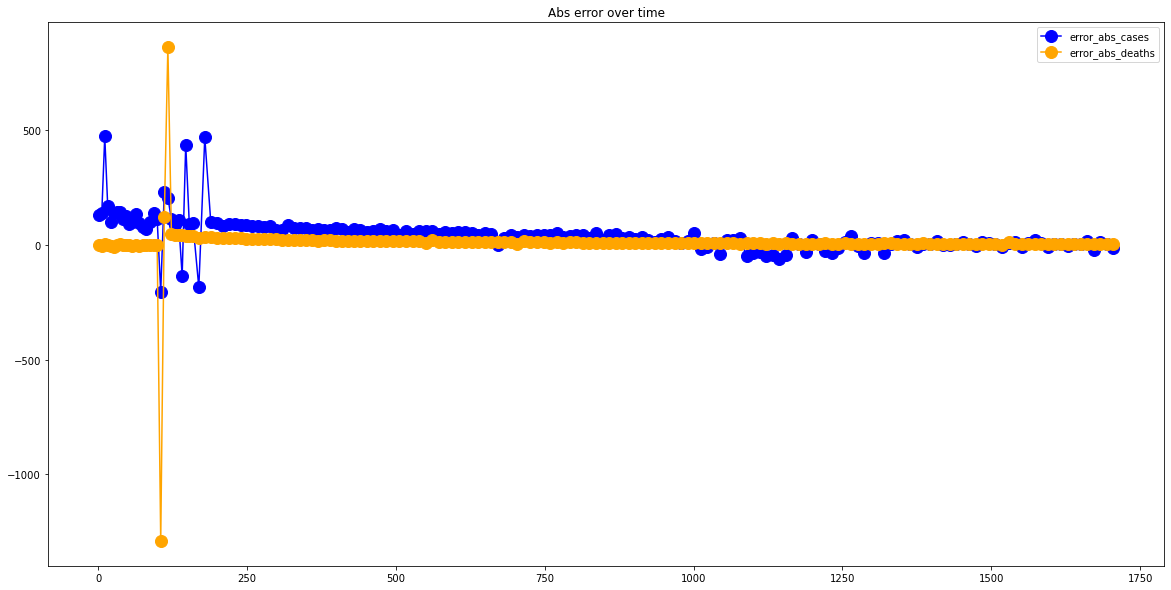

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1020.875
RMSE =  3502.930957307989
-- United Kingdom performances for deaths --
MAE =  214.0625
RMSE =  711.26982007143


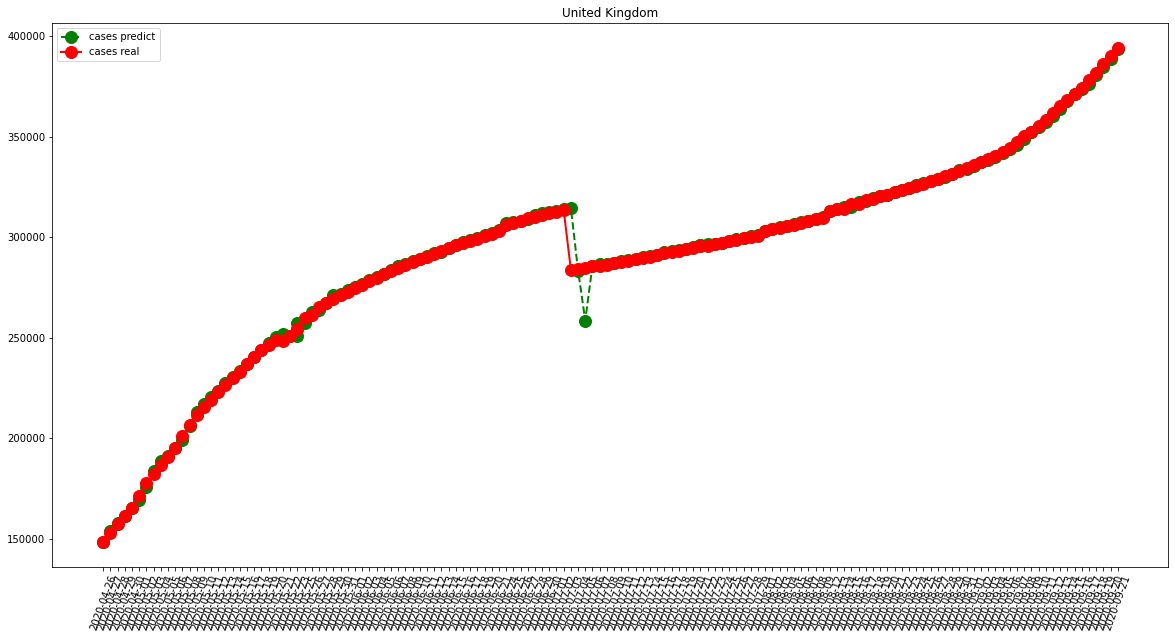

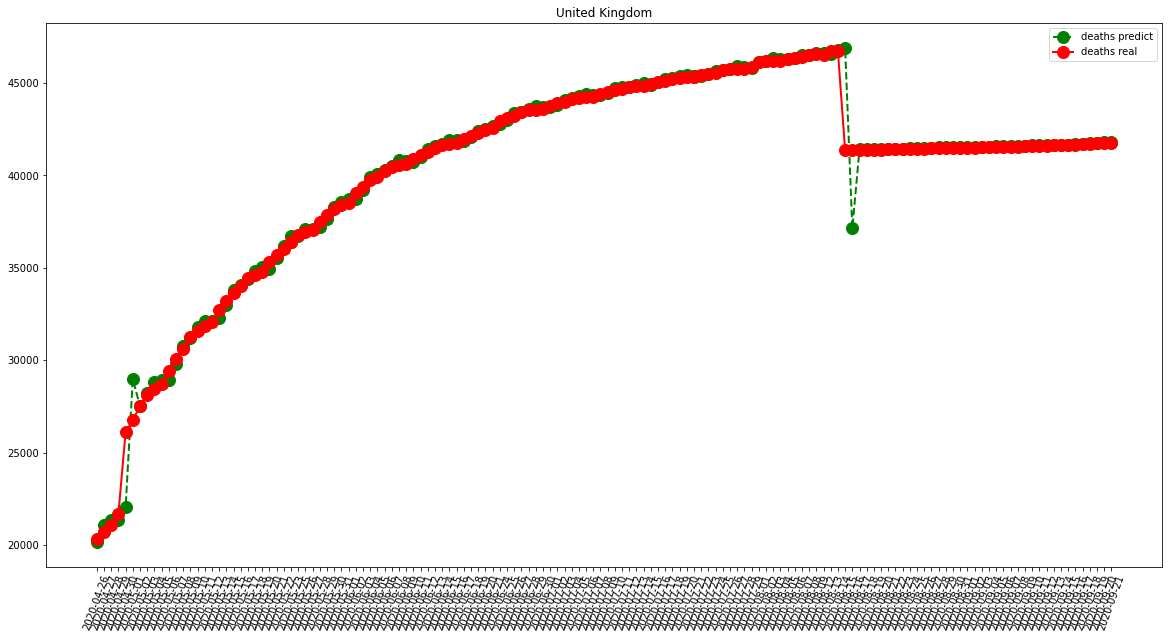

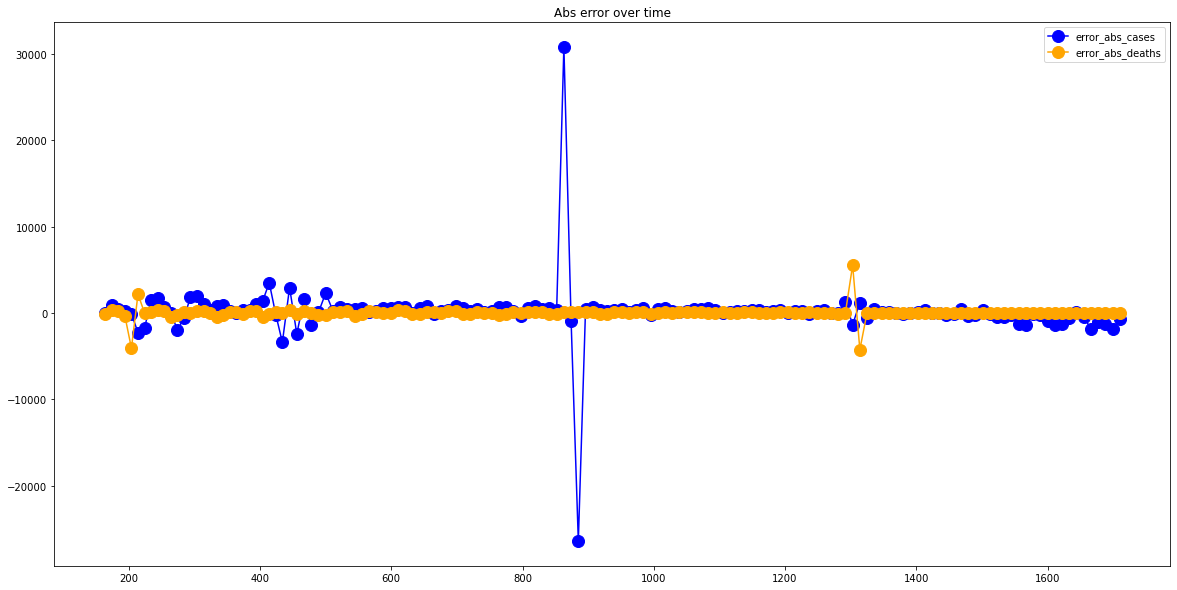

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  416.97222222222223
RMSE =  586.6617779152368
-- Germany performances for deaths --
MAE =  18.97222222222222
RMSE =  36.729491632141546


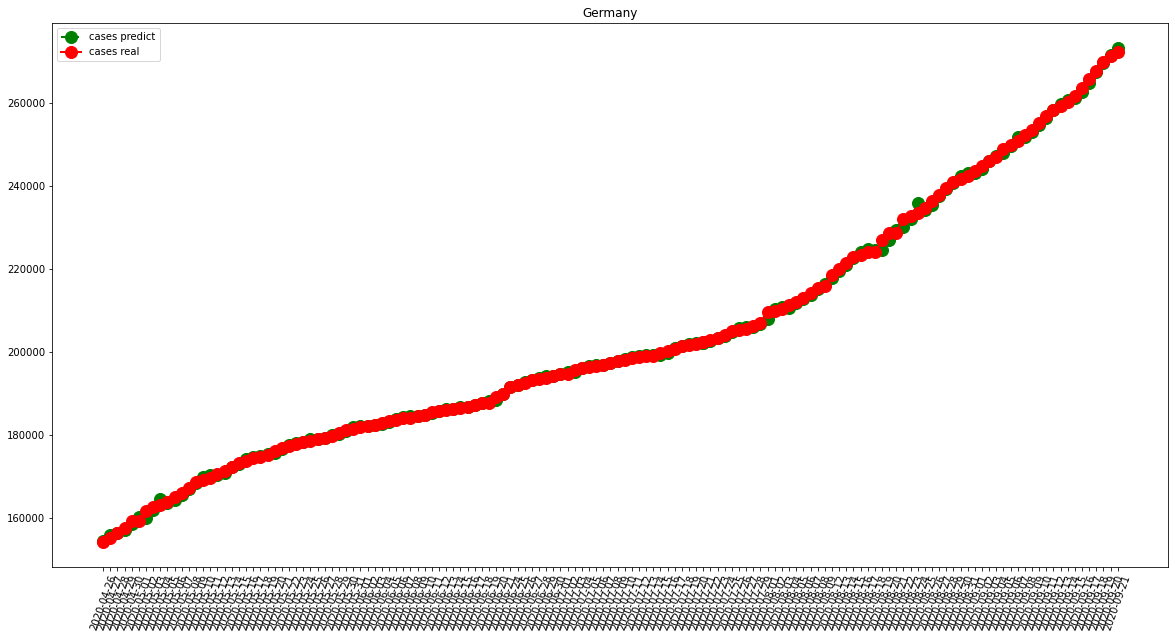

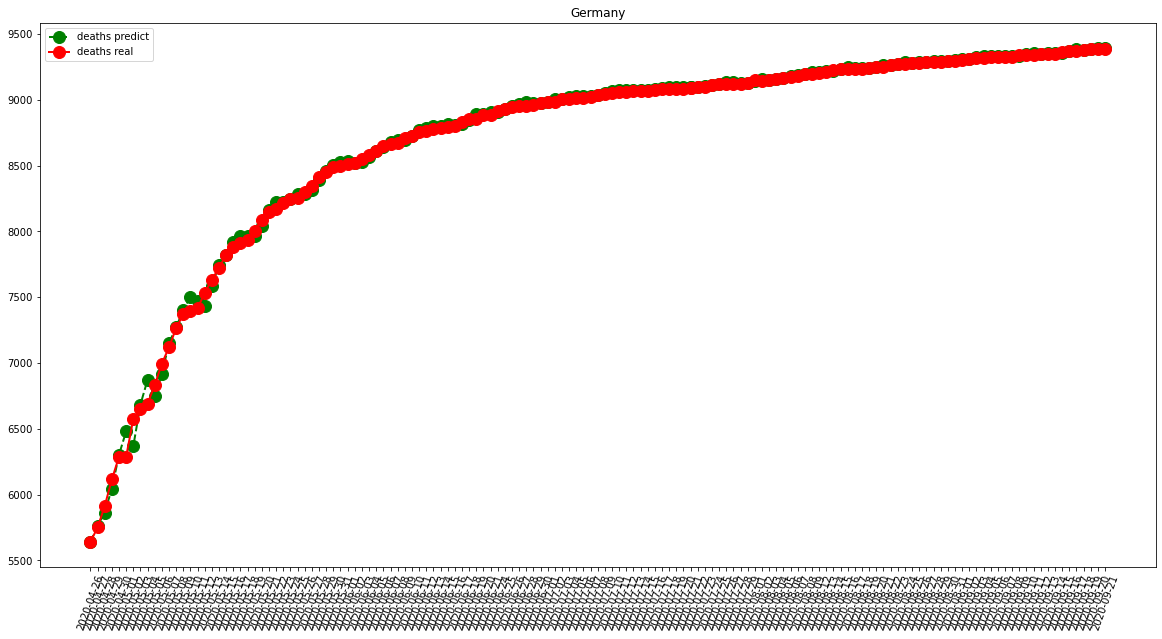

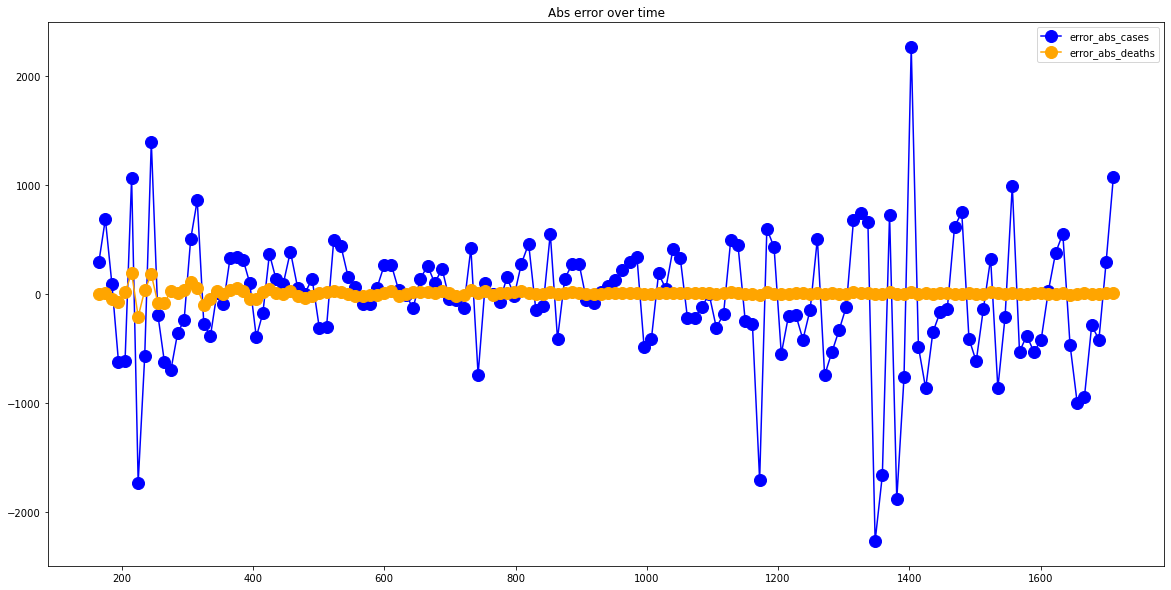

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  872.2361111111111
RMSE =  1229.136157813464
-- Iran performances for deaths --
MAE =  51.90972222222222
RMSE =  85.39308617602872


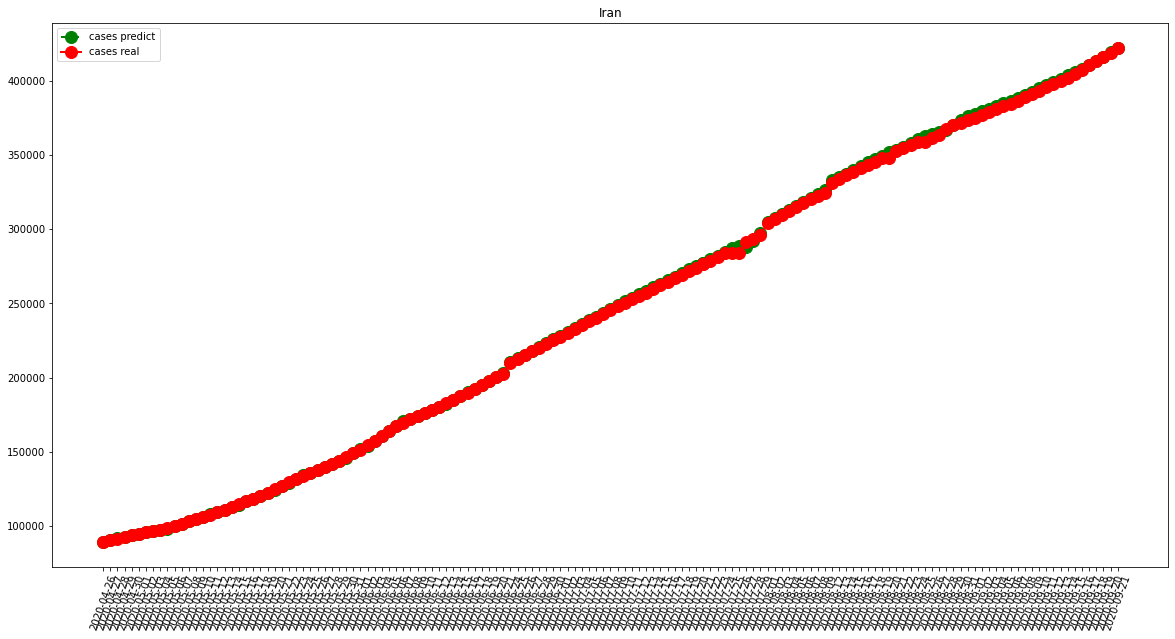

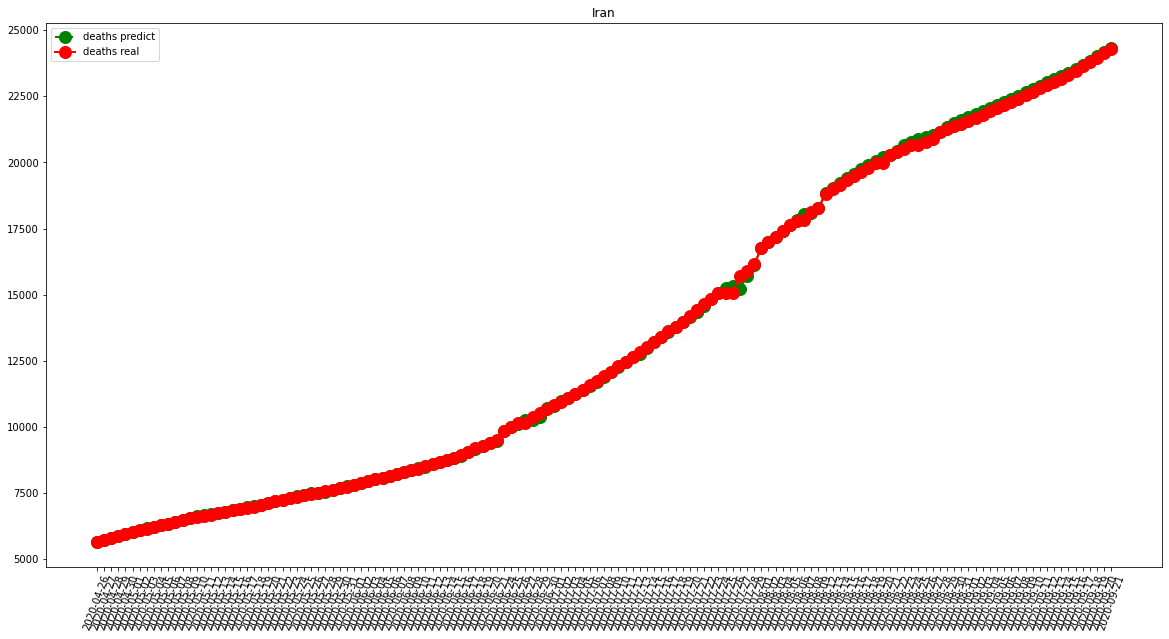

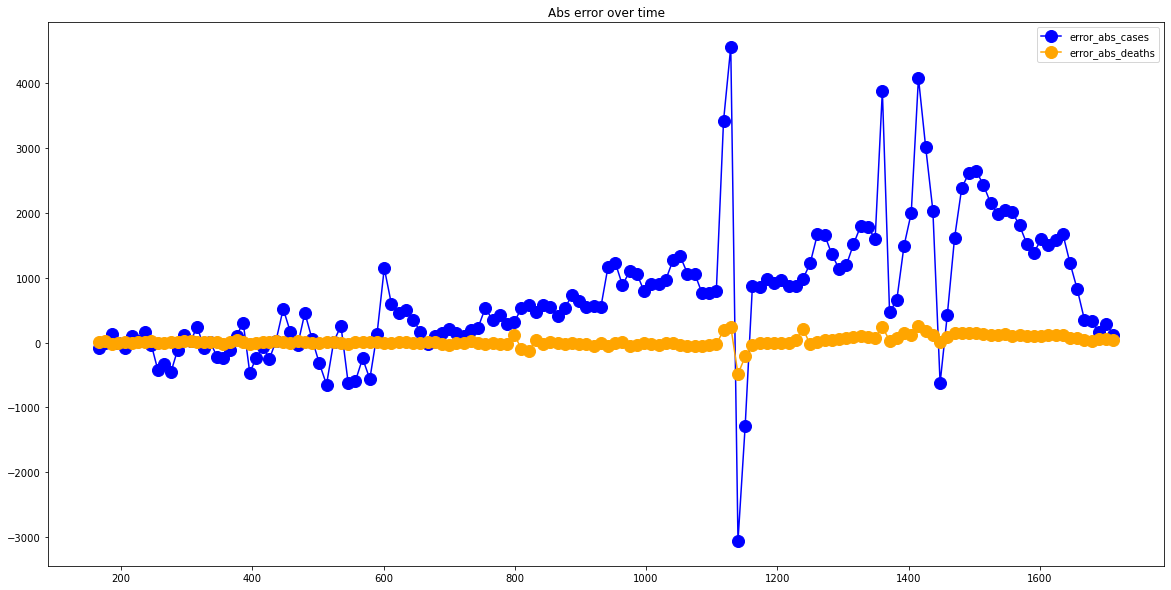

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  219.73611111111111
RMSE =  328.9514908513614
-- Turkey performances for deaths --
MAE =  15.88888888888889
RMSE =  84.8064790501816


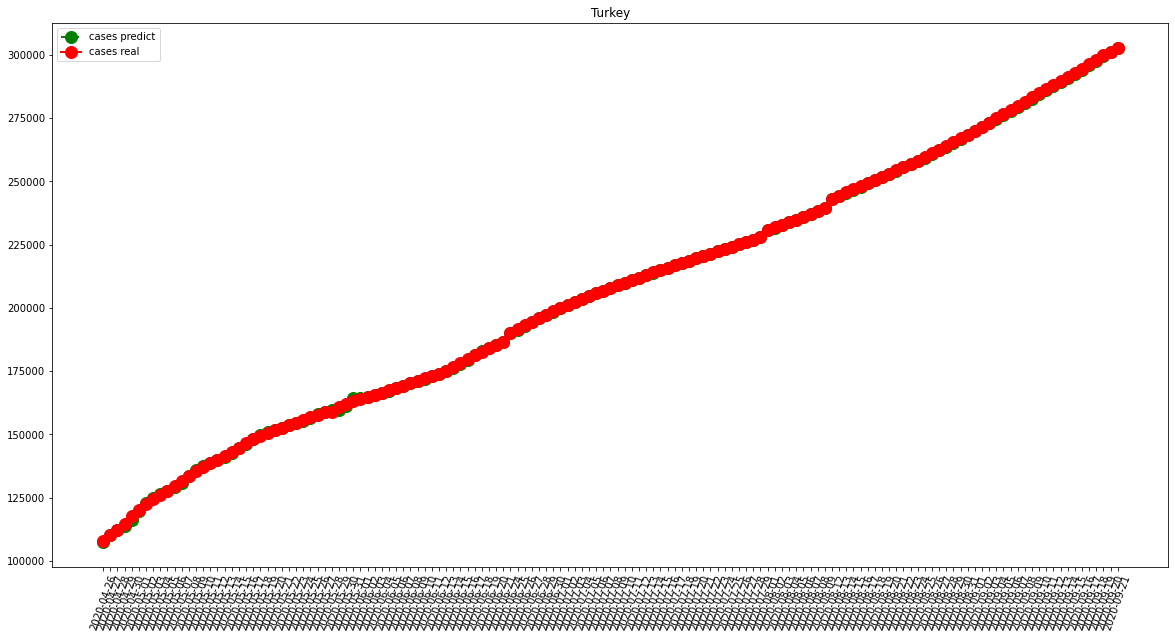

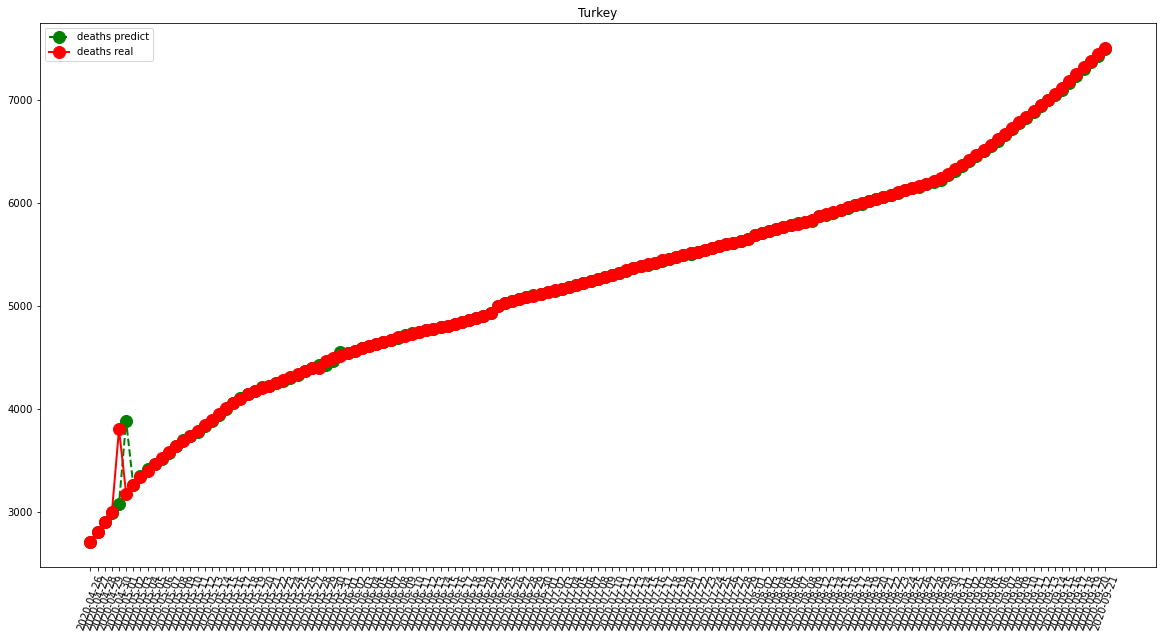

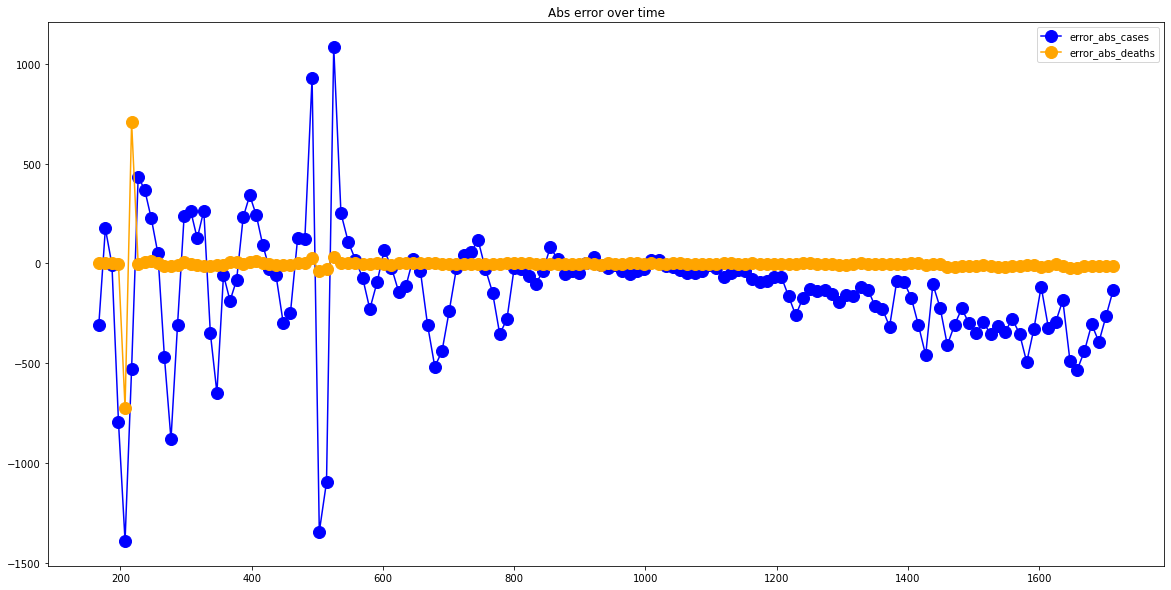

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  16315.91452991453
RMSE =  21467.970254255684
-- Brazil performances for deaths --
MAE =  486.5726495726496
RMSE =  591.170944372341


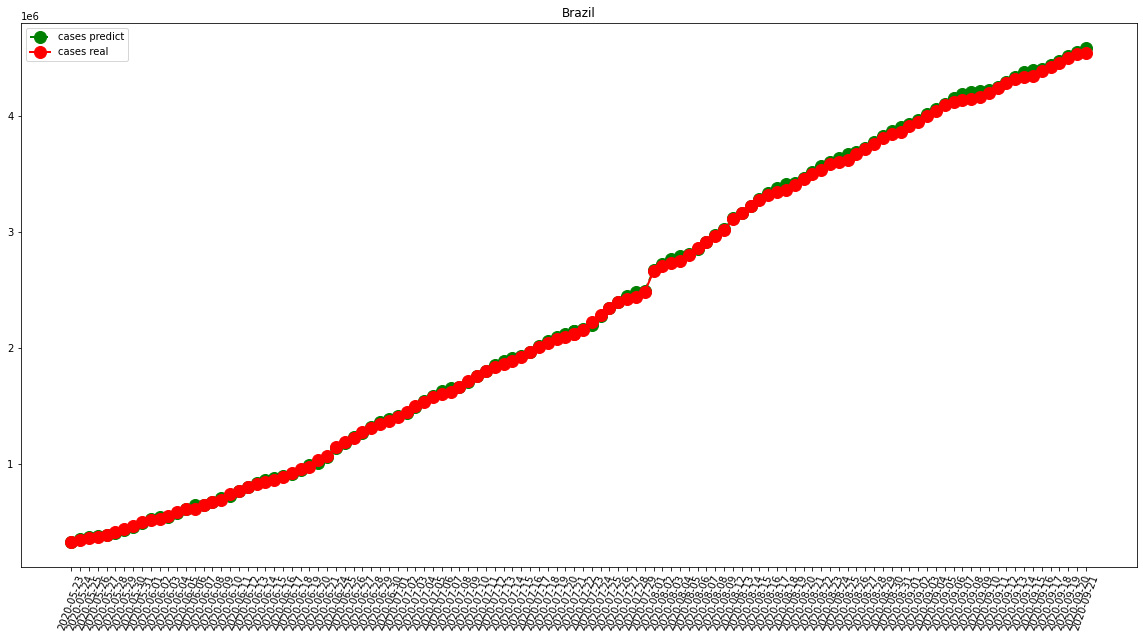

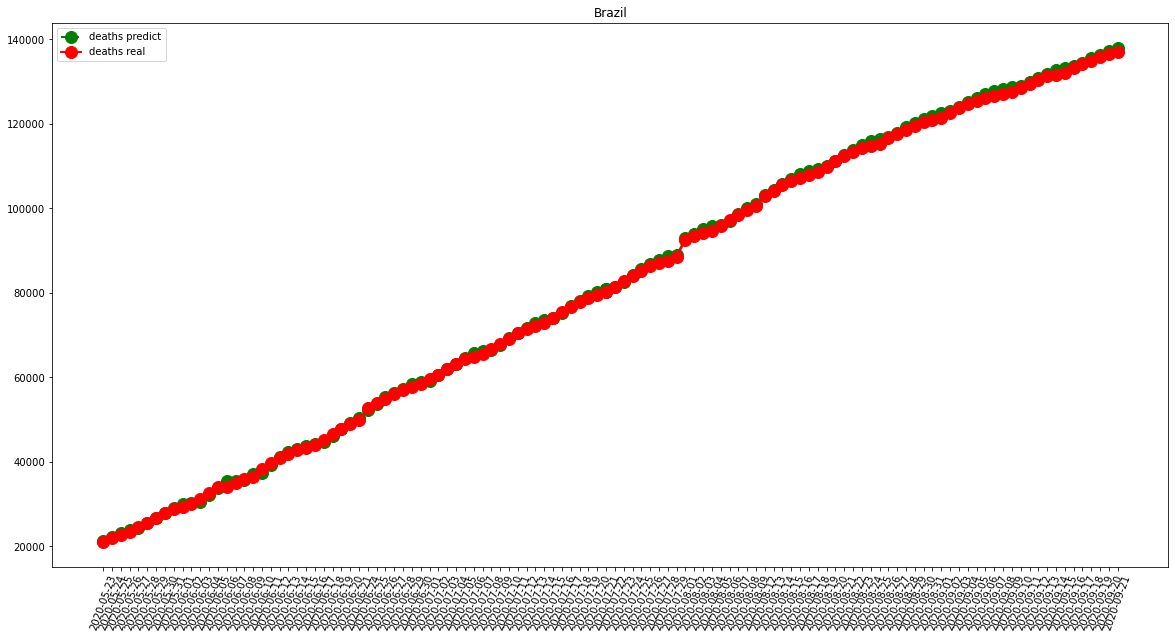

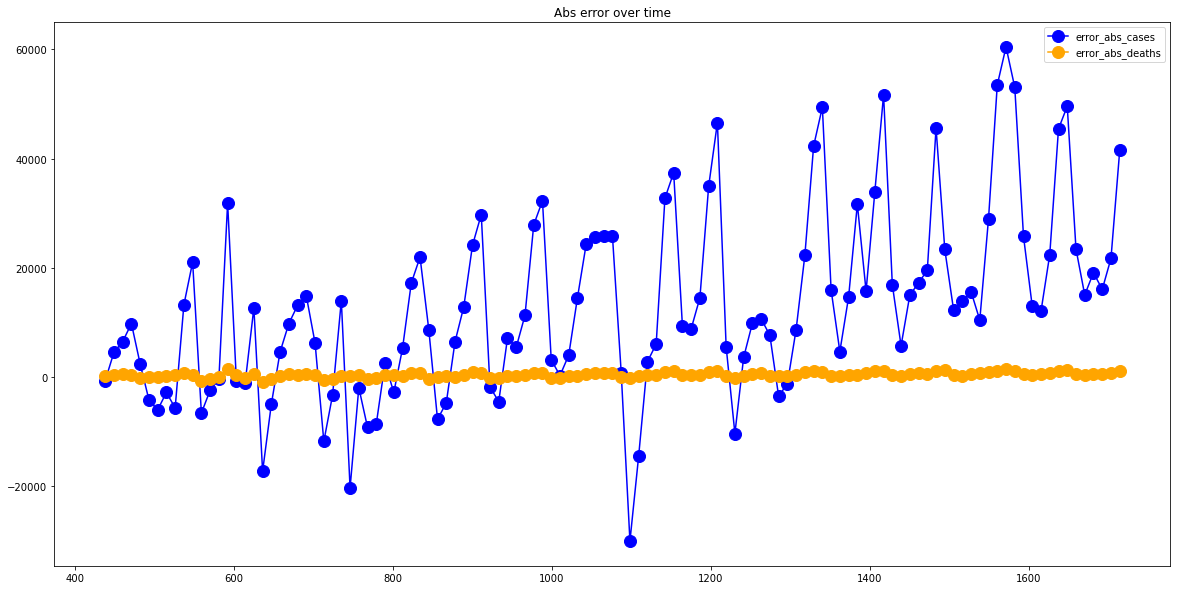

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)